In [2]:
import urllib
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import openapi

In [3]:
import requests

# ✅ API 키 및 URL 설정
s_key = "l53cN3mbhsudCVoI7zttwvpHkgCTM8on0LpEaT2FZT1/6+weHhppLkhYpjiYtdPL3/h7rqYRcFNBJQCklXUZUQ=="
url = 'http://apis.data.go.kr/B551172/Gastric06/gsPastSmokeByType'

# ✅ 기본 파라미터 설정 (numOfRows를 정수로 변경)
params = {
    'serviceKey': s_key,
    'type': 'json',
    'numOfRows': 100,  # 🔹 문자열이 아닌 정수로 변경
    'centerNm': '국립암센터',
    'fromYear': '2010',
    'toYear': '2019',
    'pageNo': 1
}

all_data = []

# 1️⃣ 먼저 첫 번째 요청을 보내서 totalCount 확인
response = requests.get(url, params=params)

if response.status_code == 200:
    resp_dict = response.json()
    
    # 🔹 totalCount가 없는 경우 대비하여 기본값 0 설정
    total_count = int(resp_dict.get('totalCount', 0))  
    items_per_page = params['numOfRows']  
    total_pages = (total_count // items_per_page) + (1 if total_count % items_per_page else 0)

    print(f"📌 총 데이터 개수: {total_count}, 가져올 페이지 수: {total_pages}")

    # 2️⃣ total_pages 만큼 반복하여 모든 데이터를 가져오기
    for i in range(1, total_pages + 1):
        params['pageNo'] = i  
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            resp_dict = response.json()
            items = resp_dict.get('items', [])  # 🔹 데이터가 없을 경우 빈 리스트 반환
            all_data.extend(items)
        else:
            print(f"❌ 데이터 요청 실패 (페이지 {i})")

    print(f"✅ 총 {len(all_data)}개의 데이터 수집 완료!")

else:
    print("❌ API 요청 실패")

📌 총 데이터 개수: 1053, 가져올 페이지 수: 11
✅ 총 1053개의 데이터 수집 완료!


In [4]:
# import requests

# s_key = "l53cN3mbhsudCVoI7zttwvpHkgCTM8on0LpEaT2FZT1/6+weHhppLkhYpjiYtdPL3/h7rqYRcFNBJQCklXUZUQ=="
# url = 'http://apis.data.go.kr/B551172/Gastric06/gsPastSmokeByType'
# params ={'serviceKey' : s_key, 
#          'type' : 'json', 
#          'numOfRows' : '100', 
#          'centerNm' : '국립암센터', 
#          'fromYear' : '2010', 
#          'toYear' : '2019' }

# all_data = []

# response = requests.get(url, params=params)
# if response.status_code == 200:
#     resp_dict = response.json()
#     total_count = resp_dict.get('totalCount', 0)  # 전체 데이터 개수
#     items_per_page = params['numOfRows']         # 한 페이지당 데이터 개수
#     total_pages = (total_count // items_per_page) + (1 if total_count % items_per_page else 0)  # 총 페이지 수

#     print(f"📌 총 데이터 개수: {total_count}, 가져올 페이지 수: {total_pages}")

#     # 2. total_pages 수만큼 반복하여 모든 데이터를 가져오기
#     for i in range(1, total_pages + 1):
#         params['pageNo'] = i  
#         response = requests.get(url, params=params)
        
#         if response.status_code == 200:
#             desk_dict = response.json() 
#             items = desk_dict.get('items', [])  # 데이터가 없을 경우 빈 리스트 반환
#             all_data.extend(items)
#         else:
#             print(f"❌ 데이터 요청 실패 (페이지 {i})")

#     print(f"✅ 총 {len(all_data)}개의 데이터 수집 완료!")
# else:
#     print("❌ API 요청 실패")

In [5]:
df_smoked = pd.DataFrame(all_data)
df_smoked

,statsMetaNo,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ncsNmvl,wholNcsDnmvl,ptCntNmvl,wholPtCntDnmvl
0,17060,국립암센터,2016,74,M,Y,2,4,2,4
1,17060,국립암센터,2010,46,F,N,6,6,6,6
2,17060,국립암센터,2011,71,F,N,3,3,3,3
3,17060,국립암센터,2015,46,F,N,3,3,3,3
4,17060,국립암센터,2015,61,M,Y,7,8,7,8
...,...,...,...,...,...,...,...,...,...,...
1048,17060,국립암센터,2014,49,F,Y,1,4,1,4
1049,17060,국립암센터,2013,74,M,N,1,5,1,5
1050,17060,국립암센터,2018,37,F,N,1,1,1,1
1051,17060,국립암센터,2012,48,M,Y,1,1,1,1


In [6]:
df_smoked = df_smoked.iloc[:, [1,2,3,4,5,-2]]
df_smoked

,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ptCntNmvl
0,국립암센터,2016,74,M,Y,2
1,국립암센터,2010,46,F,N,6
2,국립암센터,2011,71,F,N,3
3,국립암센터,2015,46,F,N,3
4,국립암센터,2015,61,M,Y,7
...,...,...,...,...,...,...
1048,국립암센터,2014,49,F,Y,1
1049,국립암센터,2013,74,M,N,1
1050,국립암센터,2018,37,F,N,1
1051,국립암센터,2012,48,M,Y,1


In [7]:
df_smoked.rename(columns={'statsTrgtNm':'과거 흡연 여부'}, inplace=True)

C:\Users\human\AppData\Local\Temp\ipykernel_24572\1126199875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoked.rename(columns={'statsTrgtNm':'과거 흡연 여부'}, inplace=True)


In [8]:
df_smoked.rename(columns={'centerNm':'센터 이름', 'critYr':'기준 년도', 'ptAge':'연령' ,'ptSexCd':'성별', 'ptCntNmvl': '환자수'}, inplace=True)
df_smoked

C:\Users\human\AppData\Local\Temp\ipykernel_24572\93775754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoked.rename(columns={'centerNm':'센터 이름', 'critYr':'기준 년도', 'ptAge':'연령' ,'ptSexCd':'성별', 'ptCntNmvl': '환자수'}, inplace=True)


,센터 이름,기준 년도,연령,성별,과거 흡연 여부,환자수
0,국립암센터,2016,74,M,Y,2
1,국립암센터,2010,46,F,N,6
2,국립암센터,2011,71,F,N,3
3,국립암센터,2015,46,F,N,3
4,국립암센터,2015,61,M,Y,7
...,...,...,...,...,...,...
1048,국립암센터,2014,49,F,Y,1
1049,국립암센터,2013,74,M,N,1
1050,국립암센터,2018,37,F,N,1
1051,국립암센터,2012,48,M,Y,1


In [9]:
smoked_count = df_smoked.groupby('과거 흡연 여부')['환자수'].count()
smoked_count

과거 흡연 여부
N    614
Y    439
Name: 환자수, dtype: int64

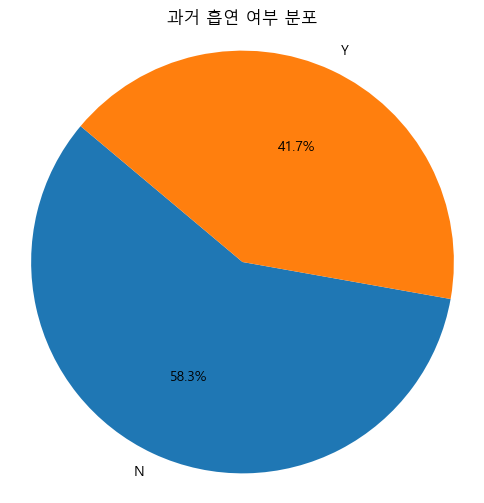

In [10]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(smoked_count.values, labels=smoked_count.index, autopct='%1.1f%%', startangle=140)
plt.title('과거 흡연 여부 분포')
plt.axis('equal')
plt.show()